In [1]:
using Interpolations, Plots

In [130]:
# Generate original data
xmin, xmax = -2.0, 3.0
x = range(xmin, xmax, length=20)

ymin, ymax = 0.0, 3.0
y = range(ymin, ymax, length=10)
z = @. cos(x*5) + (y')^2 + 1
;

In [131]:
# Create interpolator
itp = interpolate((x,y),z, Gridded(Linear()))
;

In [132]:
# Create extrapolator
etp = extrapolate(itp, Flat())
;

In [140]:
typeof(etp)

Interpolations.Extrapolation{Float64, 2, Interpolations.GriddedInterpolation{Float64, 2, Matrix{Float64}, Gridded{Linear{Throw{OnGrid}}}, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}, Gridded{Linear{Throw{OnGrid}}}, Flat{Nothing}}

In [133]:
# Generate new axes (high resolution)
x2 = range(xmin-2, xmax+2, length=300)
y2 = range(ymin  , ymax  , length=300)
;

In [134]:
# Do interpolation to new axes
z2 = [etp(x,y) for y in y2, x in x2]
;

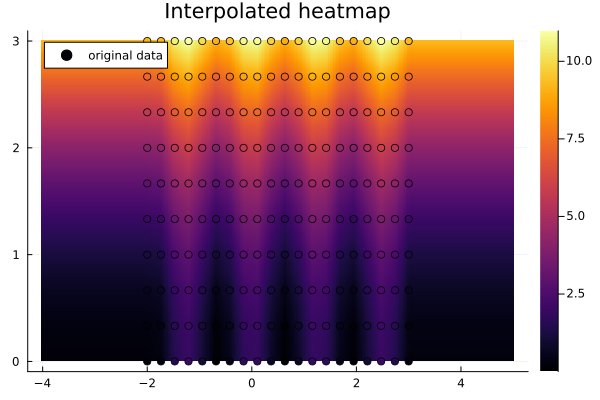

In [138]:
# Plot to compare
fig = plot()
clim = (minimum(z), maximum(z))
heatmap!(fig, x2, y2, z2, title="Interpolated heatmap", clim=clim)
scatter!(fig, [x for _ in y for x in x], [y for y in y for _ in x], zcolor=z[:]; lab="original data", clim=clim)
display(fig)